In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]
df = pd.read_csv("/Users/qiao/Documents/ML/Lecture1/train.csv", names = names,index_col=0)

In [3]:
# for i in range(len(names)):
#     print(names[i] + " ", end = '')
# print()
# for i in range(6):
#     for j in range(len(names)):
#         print(df.iloc[i][j], end = '')
#         print(" ", end = '')
#     print()
df.head(6)

,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
t,,,,,,,,,,,,,,,,
0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


From the dataframe df, extract the time indices into a vector t and extract I2, the current into the second joint. Place the current in a vector y and plot y vs. t. Label the axes with the units.

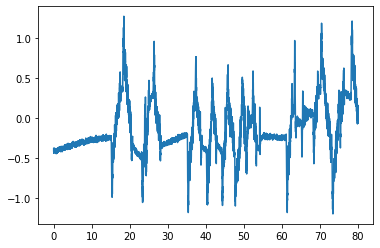

In [4]:
y = df['I2']
t = df.index
plt.plot(t, y)

Use all the samples from the experiment 1 dataset to create the training data:

ytrain: A vector of all the samples from the I2 column
Xtrain: A matrix of the data with the columns: ['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']

In [5]:
ytrain = y
xtrain = df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]

Use the sklearn.linear_model module to create a LinearRegression class regr.

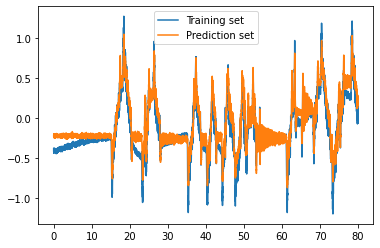

In [6]:
from sklearn import linear_model
# Create linear regression object
reg = linear_model.LinearRegression()
# Train the model on the training data.
reg.fit(xtrain, ytrain)
param = np.array(reg.coef_).T
pred = np.dot(xtrain, param)
pred = pred.T
plt.plot(t, ytrain, label='Training set')
plt.plot(t, pred, label='Prediction set')
plt.legend()

In [7]:
# Measure the normalized RSS given by `RSS / (n s^2_y).
diff = pred - ytrain
# RSS = sum(diff * diff)
# RSS / len(t)
RSS = np.mean((pred-ytrain)**2)/(np.std(ytrain)**2)
RSS

0.1577810913584687

Measure the Fit on an Indepdent Dataset

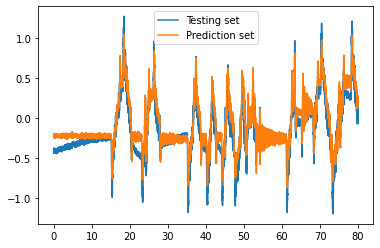

In [8]:
df2 = pd.read_csv("/Users/qiao/Documents/ML/Lecture1/test.csv", names = names, index_col=0)
xtest2 = df2[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]
ytest2 = df2['I2']
pred2 = np.dot(xtest2, param)
pred2 = pred2.T
plt.plot(t, ytrain, label='Testing set')
plt.plot(t, pred, label='Prediction set')
plt.legend()

In [9]:
# diff2 = pred2 - ytest2
RSS = np.mean((pred2-ytest2)**2)/(np.std(ytest2)**2)
RSS

0.27942516367725495